# Kapitel 11
## Feature Engineering

In [1]:
from sklearn import preprocessing
import pandas as pd

schueler_liste = { 'schueler' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Note': ["sehr gut", "gut", "gut", "befriedigend", "genügend", "nicht genügend", "sehr gut", "genügend", "gut", "gut"],
    'Haarfarbe': ["braun", "schwarz", "blond", "blau", "schwarz", "brünette", "rot", "braun", "schwarz", "schwarz"] }

df = pd.DataFrame(schueler_liste, columns = ['schueler', 'Note', 'Haarfarbe'])




In [2]:
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(df['Note'])
lab_enc.transform(df['Note'])

array([4, 2, 2, 0, 1, 3, 4, 1, 2, 2])

In [3]:
one_enc = preprocessing.OneHotEncoder(sparse=False)
help_enc = preprocessing.LabelEncoder()
help_col = help_enc.fit_transform(df['Haarfarbe'])
one_enc.fit_transform(help_col.reshape(len(df['Haarfarbe']),-1))

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

### Category Encoders mit Boston-Housing-Dataset

In [4]:
import category_encoders as ce
import pandas as pd
from sklearn.datasets import load_boston

In [6]:
# Vorbereitung der Daten
bucket = load_boston()
y = bucket.target
y.shape

(506,)

In [11]:
# load_boston() liefert ein Dictionary mit Daten zu Hauspreisen im Gebiet Boston
# und auch die entsprechenden Feature-Daten
# mit dem Befehl print(bucket.DESCR) erhält man eine ausführliche Beschreibung des Datasets
# print(bucket.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
X = pd.DataFrame(bucket.data,columns=bucket.feature_names)

In [10]:
# Wir sehen uns die ersten 3 Datensätze an
X.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03

### Binary Encoder: speichert OneHotVector in eine binäre Zahl

In [15]:
# Verwendung von Binary Encoding für zwei kategorische Features
encoded = ce.BinaryEncoder(cols=['CHAS', 'RAD']).fit(X, y)

In [16]:
# Transformation des Datensatzes
X_trans = encoded.transform(X)

In [17]:
# Anzeige der Ergebnisse
X_trans.head(3)

CRIM    ZN  INDUS  CHAS_0  CHAS_1    NOX     RM   AGE     DIS  RAD_0  \
0  0.00632  18.0   2.31       0       1  0.538  6.575  65.2  4.0900      0   
1  0.02731   0.0   7.07       0       1  0.469  6.421  78.9  4.9671      0   
2  0.02729   0.0   7.07       0       1  0.469  7.185  61.1  4.9671      0   

   RAD_1  RAD_2  RAD_3  RAD_4    TAX  PTRATIO       B  LSTAT  
0      0      0      0      1  296.0     15.3  396.90   4.98  
1      0      0      1      0  242.0     17.8  396.90   9.14  
2      0      0      1      0  242.0     17.8  392.83   4.03

In [18]:
# Weitere Information zu "category_encoders":
# http://contrib.scikit-learn.org/categorical-encoding/#category_encoders

## Binning
### Binning von Altersangaben mit fixer Bereichslänge

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Erzeuge 150 zufällige Alterswerte im Bereich zwischen 0 und 99
zaehler = np.random.randint(0,100,150)

In [8]:
zaehler

array([26, 89, 15, 40, 72, 55, 84,  9,  7, 86, 61, 81, 74, 88, 57, 38,  7,
       83,  9, 12, 78, 53, 58,  1, 10, 12, 87, 46, 88, 57,  8, 98, 46, 40,
       10, 61, 17, 39, 45,  1, 63, 19, 33, 52, 61, 22, 80, 78, 31, 53, 71,
       44, 57, 89, 83, 91, 64, 38, 39, 18, 55,  1, 45, 15, 77, 79, 90, 26,
       97, 92, 70, 64, 32, 77, 80, 74, 91, 49, 85, 39, 90, 59, 81, 70, 56,
       28, 93, 70, 82, 18, 11, 81, 84, 41, 88, 25, 39, 98, 64, 53, 76, 49,
       17, 23, 15, 52, 31, 54,  1, 30,  2, 78, 63, 69, 78, 82, 51, 82, 26,
       82,  2, 62, 30, 31, 48,  0, 31, 64, 72, 91, 98, 32, 16, 31, 48, 69,
        3, 73,  8, 86, 51, 63, 48, 63, 11, 67, 99, 24, 22, 70])

In [11]:
# Zeige die ersten 10 Werte
print(zaehler[:10])

[26 89 15 40 72 55 84  9  7 86]


In [9]:
# Ordne die Zahlenwerte den Bins zu, im 10er-Abstand (also 0-9, 10-19 etc.)
np.floor_divide(zaehler,10)

array([2, 8, 1, 4, 7, 5, 8, 0, 0, 8, 6, 8, 7, 8, 5, 3, 0, 8, 0, 1, 7, 5,
       5, 0, 1, 1, 8, 4, 8, 5, 0, 9, 4, 4, 1, 6, 1, 3, 4, 0, 6, 1, 3, 5,
       6, 2, 8, 7, 3, 5, 7, 4, 5, 8, 8, 9, 6, 3, 3, 1, 5, 0, 4, 1, 7, 7,
       9, 2, 9, 9, 7, 6, 3, 7, 8, 7, 9, 4, 8, 3, 9, 5, 8, 7, 5, 2, 9, 7,
       8, 1, 1, 8, 8, 4, 8, 2, 3, 9, 6, 5, 7, 4, 1, 2, 1, 5, 3, 5, 0, 3,
       0, 7, 6, 6, 7, 8, 5, 8, 2, 8, 0, 6, 3, 3, 4, 0, 3, 6, 7, 9, 9, 3,
       1, 3, 4, 6, 0, 7, 0, 8, 5, 6, 4, 6, 1, 6, 9, 2, 2, 7])

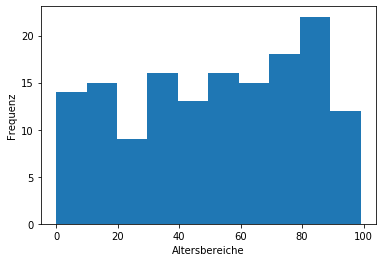

In [10]:
plt.hist(zaehler, bins=10)
plt.ylabel('Frequenz')
plt.xlabel('Altersbereiche')
plt.show()

### Quantiles Binning

In [13]:
import pandas as pd

# Generiere beliebige Zahlen
bewertungen = np.random.randint(0,10000,100)
bewertungen

array([7514, 6654, 8723, 6040, 9372, 7578, 3624, 4434, 5416, 3798, 2921,
        713, 4107, 6642, 1268, 3963, 9066, 1482,   67, 5460,  159, 9814,
       4571, 7995, 7926, 8939, 6219, 4486, 3416, 5089, 9681, 2368, 7345,
       7738, 9758, 1234, 8574, 7877, 1628, 9929, 8211,  963, 3698, 2914,
       9727, 1052,  222, 7563, 6872, 4252, 7508,  672, 9272, 3620, 1100,
       1078, 9764, 6829, 2256, 7147, 4653, 3952, 4182, 4472, 8584, 7222,
       4138, 5257, 1064, 8282, 8407,  254, 1627, 1171, 9664, 5318, 3699,
        947,  441,    7, 6049, 9248, 6301, 1986, 5774, 3261, 6685, 4186,
       9786, 7568, 6825, 9478, 7799, 4275, 9739, 8928, 1977, 7174, 9000,
       6742])

In [14]:
# Bei der Bestimmung der Perzentil-Grenzen hilft uns die pandas-Funkation qcut
perz_grenzen = pd.qcut(bewertungen,10)
perz_grenzen

[(6775.2, 7564.5], (5438.0, 6775.2], (8440.4, 9382.6], (5438.0, 6775.2], (8440.4, 9382.6], ..., (8440.4, 9382.6], (1907.2, 3675.8], (6775.2, 7564.5], (8440.4, 9382.6], (5438.0, 6775.2]]
Length: 100
Categories (10, interval[float64]): [(6.999, 1043.1] < (1043.1, 1907.2] < (1907.2, 3675.8] < (3675.8, 4265.8] ... (6775.2, 7564.5] < (7564.5, 8440.4] < (8440.4, 9382.6] < (9382.6, 9929.0]]

### Logarithmisches Binning

In [21]:
# Generiere 150 Zahlen mit großen Zahlenunterschieden,
# die Webzugriffe simulieren sollen 
webzugriffe = np.random.randint(0,10000000,150)
print(webzugriffe[0:10])

[ 335444 7868163 5098486 3711327 3378178 9818375 2065891 6076547 9473810
 5149274]


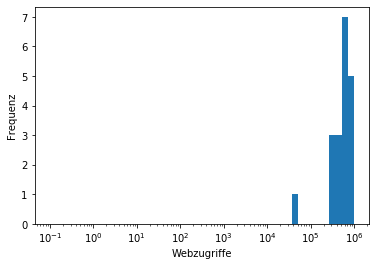

In [24]:
# Ausgabe des logarithmischen Binnings, wo die Grenzen der Bins 
# 10er-Logarithmen sind
plt.hist(webzugriffe,bins=np.logspace(np.log10(0.1),np.log10(1000000.0),50))
plt.gca().set_xscale("log")
plt.ylabel('Frequenz')
plt.xlabel('Webzugriffe')
plt.show()

## Skalierung / Normalisierung 

In [27]:
from sklearn.preprocessing import scale, minmax_scale
import numpy as np

In [28]:
rand_elems = np.random.randint(0,10000,100).astype(np.float64)

In [33]:
# Min-Max-Skalierung
v_minmax_sc = minmax_scale(rand_elems)
v_minmax_sc[:10]

array([0.22906404, 0.028633  , 0.7202381 , 0.49651067, 0.22085386,
       0.69683908, 0.20320197, 0.56465517, 0.17672414, 0.02288588])

In [32]:
# Varianz-Skalierung
x_var_sc = scale(rand_elems, with_mean=True, with_std=True)
x_var_sc[:10]

array([-0.78593042, -1.48038675,  0.91589651,  0.14072253, -0.81437717,
        0.83482327, -0.87553768,  0.37683057, -0.96727846, -1.50029947])

## Umwandlung von Adressen in Höhen- und Breitengrad

In [1]:
# Importieren der richtigen Bibliothek
from geopy.geocoders import Nominatim

In [3]:
# Verwenung des Nominatim-geocoder für OpenStreetMap-Daten
# Nomonatim braucht einen user_agent, der eine beliebige Bezeichnung tragen kann
geolocator = Nominatim(user_agent='Meine_Anwendung')

In [6]:
# Eingabe der geschriebenen Adresse
location = geolocator.geocode("Ferchergasse 16, 1170 Wien")
print("Adresse: ", location.address)
print("Höhen- u. Breitengrad: ", location.latitude, location.longitude)

Adresse:  16, Ferchergasse, KG Hernals, Hernals, Wien, 1170, Österreich
Höhen- u. Breitengrad:  48.2236442 16.3181414


## Textdaten

In [10]:
import nltk
# nltk.download()
# Es öffnet sich ein Fenster. Hier am besten alle (All) Pakete downloaden.

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Tokenisierung

In [12]:
from nltk.tokenize import word_tokenize
meinText = """Albert hat heute zwar gefrühstückt, allerdings hat er schon wieder einen Riesenhunger. Möglicherweise ist schon wieder Mittag!"""

In [13]:
# Tokensierung eines Textes
tokens = nltk.word_tokenize(meinText,'german')

In [14]:
print(tokens)

['Albert', 'hat', 'heute', 'zwar', 'gefrühstückt', ',', 'allerdings', 'hat', 'er', 'schon', 'wieder', 'einen', 'Riesenhunger', '.', 'Möglicherweise', 'ist', 'schon', 'wieder', 'Mittag', '!']


In [15]:
# Kleinschreibung und Entfernung von Interpunktationszeichen
tokens = [w.lower() for w in tokens]
worte = [w for w in tokens if w.isalpha()]
print(worte)

['albert', 'hat', 'heute', 'zwar', 'gefrühstückt', 'allerdings', 'hat', 'er', 'schon', 'wieder', 'einen', 'riesenhunger', 'möglicherweise', 'ist', 'schon', 'wieder', 'mittag']


### Stoppwörter

In [16]:
# Liste deutscher Stoppwörter 
# Stoppwörter sind Wörter, die zur tieferen Bedeutung einer Phrase keinen Beitrag leisten.
from random import shuffle
from nltk.corpus import stopwords
stoppwoerter = stopwords.words('german')
geschuettelt = stopwords.words('german')
shuffle(geschuettelt)
print(stoppwoerter[:10])
print(geschuettelt[:10])

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']
['ein', 'das', 'wo', 'einiges', 'wollte', 'ander', 'mich', 'aus', 'deinem', 'sie']


In [20]:
worte_ohne_stopp = [w for w in worte if not w in stoppwoerter]
print(worte_ohne_stopp)

['albert', 'heute', 'gefrühstückt', 'allerdings', 'schon', 'riesenhunger', 'möglicherweise', 'schon', 'mittag']


### Wortstamm

In [19]:
# Reduzierung auf den Wortstamm mit dem "SnowballStemmer"
from nltk.stem.snowball import SnowballStemmer
snow = SnowballStemmer("german")
stemmed = [snow.stem(w) for w in worte]
print(stemmed)

['albert', 'hat', 'heut', 'zwar', 'gefruhstuckt', 'allerding', 'hat', 'er', 'schon', 'wied', 'ein', 'riesenh', 'moglicherweis', 'ist', 'schon', 'wied', 'mittag']


### Bag-of-Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# Wortliste in einen Vektor überführen
myText=["Albert hat heute zwar gefrühstückt, allerdings hat er schon wieder einen Riesenhunger. Möglicherweise ist schon wieder Mittag!"]
count_vector = CountVectorizer()
bow = count_vector.fit_transform(myText)
print(count_vector.vocabulary_)

{'albert': 0, 'hat': 5, 'heute': 6, 'zwar': 13, 'gefrühstückt': 4, 'allerdings': 1, 'er': 3, 'schon': 11, 'wieder': 12, 'einen': 2, 'riesenhunger': 10, 'möglicherweise': 9, 'ist': 7, 'mittag': 8}


In [ ]:
# Das Problem: häufig vorkommende Wörter werden überbewertet und seltene Begriffe unterbewertet
# Aus diesem Grund gibt es den Indikator TF-IDF.

In [26]:
# TF steht für Term Frequency, also der Anzahl des Worts w in einem Dokument, und IDF für 
# Inverse Document Frequency, also log(Anzahl aller Dokumente/Anzahl aller Dokumente mit Wort w).
# Werden TF und IDF miteinander multipliziert, so werden unübliche Begriffe im Wert erhöht,
# denn sie können entscheidend für die Bedeutung eines Textes sein und häufige Begriffe reduziert.

## Datenaugmentation für Bilddaten (Bilder erzeugen)

In [27]:
# Im Bereich der Bildverarbeitung können durch einfache geometrische
# Transformationen neue Bilder geschaffen werden:
# -Translation (Verschieben)
# -Rotation (Drehen)
# -Skalierung (Vergrößern, Verkleinern)
# -Scheren (Skalieren, aber in x- und y- Richtung unterschiedlich)
# -horizontales und/oder vertikales Spiegeln

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenerator = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.3,
    horizontal_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.2,
    fill_mode='nearest')

## Dimensionsreduktion

In [32]:
## Feature Transformation
# Die Wissensbasierte Feature Transformation hängt stark von der spezifischen Domäne ab. 
# Ein einfaches Beispiel dafür wäre der sog. Body-Mass-Index (BMI) des Menschen.

### PCA (Principal Component Analysis)

In [33]:
# Die PCA ist ein Verfahren, das ein neues Koordinatenssystem bildet, 
# und zwar mit dem Ziel, möglichst wenig korrelierte Features zu erhalten.

# Die PCA verwendet dazu eine sogenannte Eigenwertzerlegung der Kovarianzmatrix des Datensates. 
# Die Kovarianzmatrix A ist eine (dxd)-Matrix, wobei d der Anzahl der Features entspricht.

from sklearn.datasets import load_iris
iris_daten = load_iris()
iris_X, iris_y = iris_daten.data, iris_daten.target

In [34]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components=2)
iris_pca.fit(iris_X)
iris_pca.transform(iris_X)

iris_pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Text(0, 0.5, 'Sepal Breite (cm)')

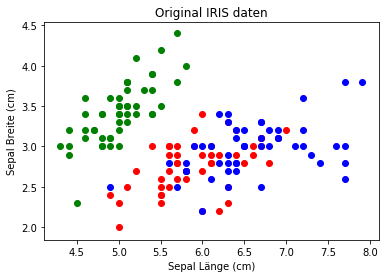

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
bezeichnung_dict = {i: k for i, k in enumerate(iris_daten.target_names)}

for lab, mark, col in zip(range(3), ('^','s','o'),('green','red','blue')):
    plt.scatter(x=iris_X[:,0].real[iris_y==lab],
                y=iris_X[:,1].real[iris_y==lab],
                color=col
               )
plt.title("Original IRIS daten")
plt.xlabel("Sepal Länge (cm)")
plt.ylabel("Sepal Breite (cm)")

In [36]:
bezeichnung_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

Text(0, 0.5, 'PCA2')

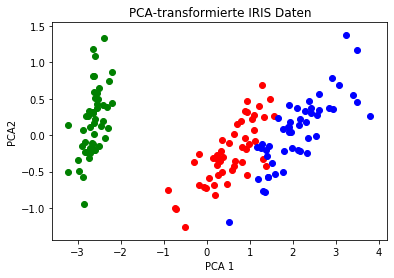

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
for lab, mark, col in zip(range(3), ('^','s','o'),('green','red','blue')):
    plt.scatter(x=iris_pca.transform(iris_X)[:,0].real[iris_y==lab],
                y=iris_pca.transform(iris_X)[:,1].real[iris_y==lab],
                color=col
               )
plt.title("PCA-transformierte IRIS Daten")
plt.xlabel("PCA 1")
plt.ylabel("PCA2")

In [40]:
## Feature-Auswahl
# Unnötige Features erhöhen den Trainingsaufwand und verringern die Generalisierungsfähikeit des Modells.
# Der Prozess des Auswählens einer Teilmenge von relevanten Features kann auf folgende Arten erfolgen:
# -Filter-Methoden --> statisches Maß für Wichtigkeit eines Features
# -Wrapper-Methoden --> verschiedene Feature-Kombinationen werden ausprobiert und miteinander verglichen

In [39]:
# Filter-Methode
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
X=iris_X
y=iris_y
myFilter = test.fit(X,y)
X_trans = myFilter.transform(X)

In [48]:
# Wrapper Methode mit der Suchmethode: 
# Rekursive Feature Elimination(RFE) und 
# des Bewertungsmodells: logistische Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

myModel=LogisticRegression(max_iter=1000)
rfe = RFE(myModel, n_features_to_select=3)
rfe = rfe.fit(X,y)